# WELCOME TO OUR MODEL:)

## If in colab

Mount notebook in drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Then allow the notebook to access your google account ie the cloud

In [6]:
from google.colab import auth
auth.authenticate_user()

# Install the required libraries !!

In [7]:
#SAM
!pip install git+https://github.com/facebookresearch/segment-anything.git
#Transformers
!pip install -q git+https://github.com/huggingface/transformers.git
#Datasets to prepare data and monai if you want to use special loss functions
!pip install datasets
!pip install -q monai
#Patchify to divide large images into smaller patches for training. (Not necessary for smaller images)
# !pip install patchify
!pip install google-cloud-storage

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-tn8dopa6
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-tn8dopa6
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=7d9dc3f222d0b0250d09f268c07d089f0242404ded6db0b7ef348035ea7171d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-addrf6yk/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/11

# Install packages !!

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from scipy import ndimage
from datasets import Dataset
from PIL import Image
from google.cloud import storage
from io import BytesIO
import tensorflow as tf

# Load images !!

**Can test that the connection to Google Cloud is working quickly w this cell**

In [ ]:
# client = storage.Client()  # Implicit environ set-up
# bucket = client.get_bucket('training_images_solar')
# blob = bucket.blob('original/1.png')
# as_bytes = blob.download_as_bytes()
# im = Image.open(BytesIO(as_bytes))
# as_bytes = blob.download_as_bytes()
# plt.imshow(Image.open(BytesIO(as_bytes)))

In [23]:
client = storage.Client()  # Implicit environ set-up
training_bucket = client.get_bucket('training_images_solar')

def import_data(folder, bucket) -> np.array:
    """
    Import images from specified Google Cloud folder
    Returns a list of arrays
    """

    #get all file names
    file_names = [blob.name for blob in bucket.list_blobs(prefix=folder)]
    #sort file names
    file_names_sorted = sorted(file_names)

    #storing all the np.array images
    folder_images = []

    i = 1
    for file in file_names_sorted:
        #import each picture from folder
        blob = bucket.blob(file)
        as_bytes = blob.download_as_bytes()
        im = Image.open(BytesIO(as_bytes))
        #resize w pillow!!
        im = im.resize((256, 256))
        # #append to list as an array
        folder_images.append(np.asarray(im, dtype=np.uint8))

        #just a counter to see how fast it's moving
        print(f"Completed {i} images")
        i+=1

    return folder_images

In [24]:
%%time

gray = import_data(folder= 'grayscale', bucket=training_bucket)

Streaming output truncated to the last 5000 lines.
Completed 2203 images
Completed 2204 images
Completed 2205 images
Completed 2206 images
Completed 2207 images
Completed 2208 images
Completed 2209 images
Completed 2210 images
Completed 2211 images
Completed 2212 images
Completed 2213 images
Completed 2214 images
Completed 2215 images
Completed 2216 images
Completed 2217 images
Completed 2218 images
Completed 2219 images
Completed 2220 images
Completed 2221 images
Completed 2222 images
Completed 2223 images
Completed 2224 images
Completed 2225 images
Completed 2226 images
Completed 2227 images
Completed 2228 images
Completed 2229 images
Completed 2230 images
Completed 2231 images
Completed 2232 images
Completed 2233 images
Completed 2234 images
Completed 2235 images
Completed 2236 images
Completed 2237 images
Completed 2238 images
Completed 2239 images
Completed 2240 images
Completed 2241 images
Completed 2242 images
Completed 2243 images
Completed 2244 images
Completed 2245 images
Com

In [26]:
original = import_data(folder= 'original', bucket=training_bucket)

Completed 1 images
Completed 2 images
Completed 3 images
Completed 4 images
Completed 5 images
Completed 6 images
Completed 7 images
Completed 8 images
Completed 9 images
Completed 10 images
Completed 11 images
Completed 12 images
Completed 13 images
Completed 14 images
Completed 15 images
Completed 16 images
Completed 17 images
Completed 18 images
Completed 19 images
Completed 20 images
Completed 21 images
Completed 22 images
Completed 23 images
Completed 24 images
Completed 25 images
Completed 26 images
Completed 27 images
Completed 28 images
Completed 29 images
Completed 30 images
Completed 31 images
Completed 32 images
Completed 33 images
Completed 34 images
Completed 35 images
Completed 36 images
Completed 37 images
Completed 38 images
Completed 39 images
Completed 40 images
Completed 41 images
Completed 42 images
Completed 43 images
Completed 44 images
Completed 45 images
Completed 46 images
Completed 47 images
Completed 48 images
Completed 49 images
Completed 50 images
Completed

KeyboardInterrupt: 

### Test run, 10 images

In [27]:
client = storage.Client()  # Implicit environ set-up
bucket = client.get_bucket('training_images_solar')

originals = []
for i in range(1,10):
    blob = bucket.blob(f'original/{i}.png')
    as_bytes = blob.download_as_bytes()
    im = Image.open(BytesIO(as_bytes))
    #resize w pillow!!
    im = im.resize((286, 286))
    # #append to list as an array
    originals.append(np.asarray(im, dtype=np.uint8))

In [28]:
client = storage.Client()  # Implicit environ set-up
bucket = client.get_bucket('training_images_solar')

grays = []
for i in range(1,10):
    blob = bucket.blob(f'grayscale/{i}mask.png')
    as_bytes = blob.download_as_bytes()
    im = Image.open(BytesIO(as_bytes))
    #resize w pillow!!
    im = im.resize((286, 286))
    # #append to list as an array
    grays.append(np.asarray(im, dtype=np.uint8))

### Check if the images loaded correctly, in order

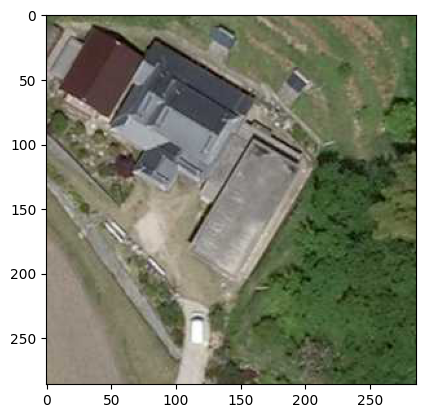

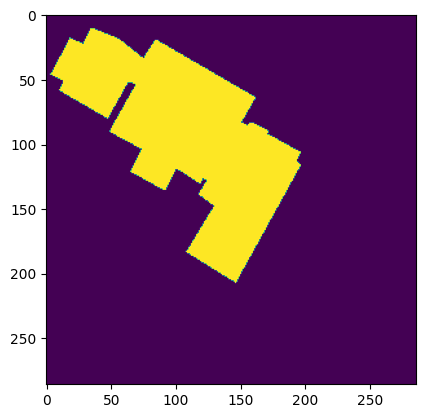

In [29]:
plt.imshow(originals[8])
plt.show()
plt.imshow(grays[8])
plt.show()

### Testing with a single image

In [ ]:
# client = storage.Client()  # Implicit environ set-up
# bucket = client.get_bucket('training_images_solar')

# def import_data(bucket)-> np.array:
#     folder_images = []

#     #import each picture from folder
#     blob = bucket.get_blob('original/1.png')
#     as_bytes = blob.download_as_bytes()
#     im = Image.open(BytesIO(as_bytes))
#     #resize w pillow!!
#     im = im.resize((286, 286))
#     folder_images.append(np.asarray(im, dtype=np.uint8))

#     return print(folder_images)

In [ ]:
# %%time

# gray = import_data(bucket)

In [ ]:
# plt.imshow(gray[0], interpolation='nearest')
# plt.show()

## Make two large arrays

In [30]:
original_np = np.array(originals)
grays_np = np.array(grays)

## Delete empty masks

In [31]:
# Create a list to store the indices of non-empty masks
valid_indices = [i for i, mask in enumerate(grays) if mask.max() != 0]

# Filter the image and mask arrays to keep only the non-empty pairs
filtered_images = original_np[valid_indices]
filtered_masks = grays_np[valid_indices]

print("Image shape:", filtered_images.shape)  # e.g., (num_frames, height, width, num_channels)
print("Mask shape:", filtered_masks.shape)

Image shape: (4, 286, 286, 3)
Mask shape: (4, 286, 286)


## Create a dataset

In [32]:
from datasets import Dataset

dataset_dict = {
    "image": [Image.fromarray(img) for img in filtered_images],
    "label": [Image.fromarray(mask) for mask in filtered_masks],
}

# Create the dataset using the datasets.Dataset class
dataset = Dataset.from_dict(dataset_dict)

Check the dataset

In [33]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 4
})

## Check that the images are properly loading

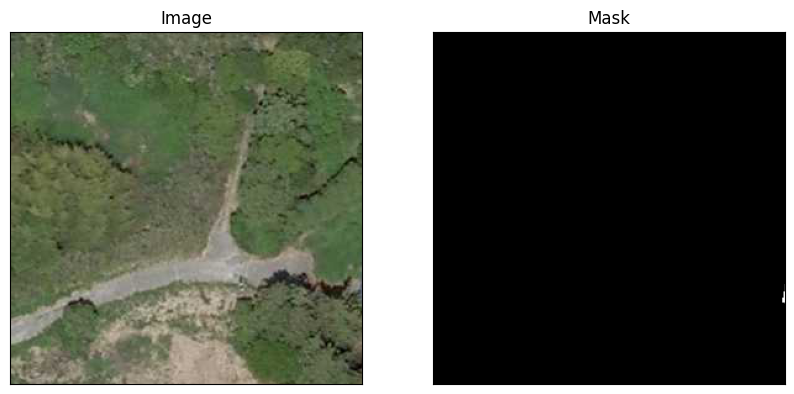

In [34]:
img_num = random.randint(0, filtered_images.shape[0]-1)
example_image = dataset[img_num]["image"]
example_mask = dataset[img_num]["label"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left
axes[0].imshow(np.array(example_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(example_mask, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()

## Create the bounding boxes

In [35]:
#Get bounding boxes from mask.
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  # add perturbation to bounding box coordinates
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]

  return bbox

In [36]:
from torch.utils.data import Dataset

class SAMDataset(Dataset):
  """
  This class is used to create a dataset that serves input images and masks.
  It takes a dataset and a processor as input and overrides the __len__ and __getitem__ methods of the Dataset class.
  """
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = item["image"]
    ground_truth_mask = np.array(item["label"])

    # get bounding box prompt
    prompt = get_bounding_box(ground_truth_mask)

    # prepare image and prompt for the model
    inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs

## Initialize processor and dataset instances

In [37]:
# Initialize the processor
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [38]:
train_dataset = SAMDataset(dataset=dataset, processor=processor)

In [39]:
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask (286, 286)


In [40]:
# Create a DataLoader instance for the training dataset
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True, drop_last=False)

In [45]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([1, 3, 1024, 1024])
original_sizes torch.Size([1, 2])
reshaped_input_sizes torch.Size([1, 2])
input_boxes torch.Size([1, 1, 4])
ground_truth_mask torch.Size([1, 286, 286])


In [46]:
batch["ground_truth_mask"].shape

torch.Size([1, 286, 286])

In [42]:
# Load the model
from transformers import SamModel
model = SamModel.from_pretrained("facebook/sam-vit-base")

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

In [43]:
from torch.optim import Adam
import monai
# Initialize the optimizer and the loss function
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-5, weight_decay=0)
#Try DiceFocalLoss, FocalLoss, DiceCELoss
seg_loss = monai.losses.DiceCELoss(sigmoid=True, squared_pred=True, reduction='mean')

## Let's train!!!!

In [44]:
from tqdm import tqdm
from statistics import mean
import torch
from torch.nn.functional import threshold, normalize

#Training loop
num_epochs = 1

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    for batch in tqdm(train_dataloader):
        # forward pass
        outputs = model(pixel_values=batch["pixel_values"].to(device),
                      input_boxes=batch["input_boxes"].to(device),
                      multimask_output=False)

        # compute loss
        predicted_masks = outputs.pred_masks.squeeze(1)
        ground_truth_masks = batch["ground_truth_mask"].float().to(device)
        loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

        # backward pass (compute gradients of parameters w.r.t. loss)
        optimizer.zero_grad()
        loss.backward()

        # optimize
        optimizer.step()
        epoch_losses.append(loss.item())

    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean(epoch_losses)}')

  0%|          | 0/4 [00:32<?, ?it/s]


AssertionError: ground truth has different shape (torch.Size([1, 1, 286, 286])) from input (torch.Size([1, 1, 256, 256]))

In [ ]:
# Save the model's state dictionary to a file
torch.save(model.state_dict(), "/content/drive/MyDrive/Colab_Notebooks/final_project/model_checkpoint.pth")

## It's prediction time

In [ ]:
from transformers import SamModel, SamConfig, SamProcessor
import torch

In [ ]:
# Load the model configuration
model_config = SamConfig.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

# Create an instance of the model architecture with the loaded configuration
solar_model = SamModel(config=model_config)
#Update the model by loading the weights from saved file.
solar_model.load_state_dict(torch.load("/content/drive/MyDrive/Colab_Notebooks/final_project/model_checkpoint.pth"))

<All keys matched successfully>

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
solar_model.to(device)

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-11): 12 x SamVisionLayer(
        (layer_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (layer_norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNorm()
     

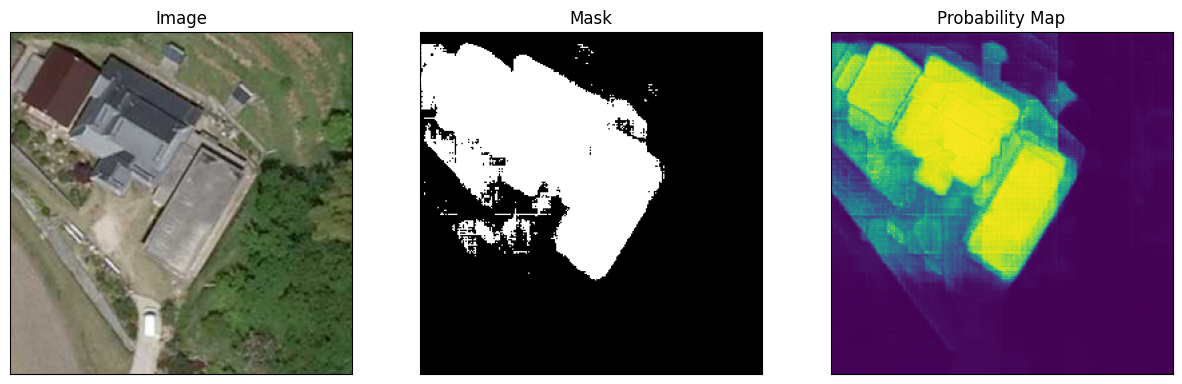

In [ ]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt

# let's take a random training example
idx = random.randint(0, filtered_images.shape[0]-1)

# load image
test_image = dataset[idx]["image"]

# get box prompt based on ground truth segmentation map
ground_truth_mask = np.array(dataset[idx]["label"])
prompt = get_bounding_box(ground_truth_mask)

# prepare image + box prompt for the model
inputs = processor(test_image, input_boxes=[[prompt]], return_tensors="pt")

# Move the input tensor to the GPU if it's not already there
inputs = {k: v.to(device) for k, v in inputs.items()}

solar_model.eval()

# forward pass
with torch.no_grad():
    outputs = solar_model(**inputs, multimask_output=False)

# apply sigmoid
medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
# convert soft mask to hard mask
medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(test_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(medsam_seg, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Plot the second image on the right
axes[2].imshow(medsam_seg_prob)  # Assuming the second image is grayscale
axes[2].set_title("Probability Map")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()